## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file=pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [21]:
# Checking the number of mice in the DataFrame.
Number_of_Mice=combined_file["Sex"].count()
Number_of_Mice

1893

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MiceID_TimePoint=combined_file.loc[:, ["Mouse ID", "Timepoint"]]
DuplicateMouse= MiceID_TimePoint[MiceID_TimePoint.duplicated(["Mouse ID"])]
DuplicateMouse

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicateMouse1= combined_file[combined_file.duplicated(["Mouse ID"])]
DuplicateMouse1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
5,k403,Ramicane,Male,21,16,25,33.46,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newtable = combined_file.drop_duplicates('Mouse ID')
newtable.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
10,s185,Capomulin,Female,3,17,0,45.00,0
20,x401,Capomulin,Female,16,15,0,45.00,0
30,m601,Capomulin,Male,22,17,0,45.00,0
40,g791,Ramicane,Male,11,16,0,45.00,0


In [25]:
# Checking the number of mice in the clean DataFrame.
New_Number_of_Mice=newtable["Sex"].count()
New_Number_of_Mice

249

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#find out what are the drug regimens
Drug_Regimen=combined_file["Drug Regimen"].unique()

#Capomulin
only_Capomulin = combined_file.loc[combined_file["Drug Regimen"] == "Capomulin", :]
Capomulin_mean=only_Capomulin["Tumor Volume (mm3)"].mean()
Capomulin_median=only_Capomulin["Tumor Volume (mm3)"].median()
Capomulin_variance=only_Capomulin["Tumor Volume (mm3)"].var()
Capomulin_Stdev=only_Capomulin["Tumor Volume (mm3)"].std()
Capomulin_SEM=only_Capomulin["Tumor Volume (mm3)"].sem()

#Ceftamin
only_Ceftamin = combined_file.loc[combined_file["Drug Regimen"] == "Ceftamin", :]
Ceftamin_mean=only_Ceftamin["Tumor Volume (mm3)"].mean()
Ceftamin_median=only_Ceftamin["Tumor Volume (mm3)"].median()
Ceftamin_variance=only_Ceftamin["Tumor Volume (mm3)"].var()
Ceftamin_Stdev=only_Ceftamin["Tumor Volume (mm3)"].std()
Ceftamin_SEM=only_Ceftamin["Tumor Volume (mm3)"].sem()

#Infubinol
only_Infubinol = combined_file.loc[combined_file["Drug Regimen"] == "Infubinol", :]
Infubinol_mean=only_Infubinol["Tumor Volume (mm3)"].mean()
Infubinol_median=only_Infubinol["Tumor Volume (mm3)"].median()
Infubinol_variance=only_Infubinol["Tumor Volume (mm3)"].var()
Infubinol_Stdev=only_Infubinol["Tumor Volume (mm3)"].std()
Infubinol_SEM=only_Infubinol["Tumor Volume (mm3)"].sem()

#Ketapril
only_Ketapril = combined_file.loc[combined_file["Drug Regimen"] == "Ketapril", :]
Ketapril_mean=only_Ketapril["Tumor Volume (mm3)"].mean()
Ketapril_median=only_Ketapril["Tumor Volume (mm3)"].median()
Ketapril_variance=only_Ketapril["Tumor Volume (mm3)"].var()
Ketapril_Stdev=only_Ketapril["Tumor Volume (mm3)"].std()
Ketapril_SEM=only_Ketapril["Tumor Volume (mm3)"].sem()

#Naftisol
only_Naftisol = combined_file.loc[combined_file["Drug Regimen"] == "Naftisol", :]
Naftisol_mean=only_Naftisol["Tumor Volume (mm3)"].mean()
Naftisol_median=only_Naftisol["Tumor Volume (mm3)"].median()
Naftisol_variance=only_Naftisol["Tumor Volume (mm3)"].var()
Naftisol_Stdev=only_Naftisol["Tumor Volume (mm3)"].std()
Naftisol_SEM=only_Naftisol["Tumor Volume (mm3)"].sem()

#Placebo
only_Placebo = combined_file.loc[combined_file["Drug Regimen"] == "Placebo", :]
Placebo_mean=only_Placebo["Tumor Volume (mm3)"].mean()
Placebo_median=only_Placebo["Tumor Volume (mm3)"].median()
Placebo_variance=only_Placebo["Tumor Volume (mm3)"].var()
Placebo_Stdev=only_Placebo["Tumor Volume (mm3)"].std()
Placebo_SEM=only_Placebo["Tumor Volume (mm3)"].sem()

#Propriva
only_Propriva = combined_file.loc[combined_file["Drug Regimen"] == "Propriva", :]
Propriva_mean=only_Propriva["Tumor Volume (mm3)"].mean()
Propriva_median=only_Propriva["Tumor Volume (mm3)"].median()
Propriva_variance=only_Propriva["Tumor Volume (mm3)"].var()
Propriva_Stdev=only_Propriva["Tumor Volume (mm3)"].std()
Propriva_SEM=only_Propriva["Tumor Volume (mm3)"].sem()

#Ramicane
only_Ramicane = combined_file.loc[combined_file["Drug Regimen"] == "Ramicane", :]
Ramicane_mean=only_Ramicane["Tumor Volume (mm3)"].mean()
Ramicane_median=only_Ramicane["Tumor Volume (mm3)"].median()
Ramicane_variance=only_Ramicane["Tumor Volume (mm3)"].var()
Ramicane_Stdev=only_Ramicane["Tumor Volume (mm3)"].std()
Ramicane_SEM=only_Ramicane["Tumor Volume (mm3)"].sem()

#Stelasyn
only_Stelasyn = combined_file.loc[combined_file["Drug Regimen"] == "Stelasyn", :]
Stelasyn_mean=only_Stelasyn["Tumor Volume (mm3)"].mean()
Stelasyn_median=only_Stelasyn["Tumor Volume (mm3)"].median()
Stelasyn_variance=only_Stelasyn["Tumor Volume (mm3)"].var()
Stelasyn_Stdev=only_Stelasyn["Tumor Volume (mm3)"].std()
Stelasyn_SEM=only_Stelasyn["Tumor Volume (mm3)"].sem()

#Zoniferol
only_Zoniferol = combined_file.loc[combined_file["Drug Regimen"] == "Zoniferol", :]
Zoniferol_mean=only_Zoniferol["Tumor Volume (mm3)"].mean()
Zoniferol_median=only_Zoniferol["Tumor Volume (mm3)"].median()
Zoniferol_variance=only_Zoniferol["Tumor Volume (mm3)"].var()
Zoniferol_Stdev=only_Zoniferol["Tumor Volume (mm3)"].std()
Zoniferol_SEM=only_Zoniferol["Tumor Volume (mm3)"].sem()
 
#summary
summary1=pd.DataFrame({
    "name":["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
    "mean":[Capomulin_mean,Ceftamin_mean,Infubinol_mean,Ketapril_mean,Naftisol_mean,Placebo_mean,Propriva_mean,Ramicane_mean,Stelasyn_mean,Zoniferol_mean],
    "median":[Capomulin_median,Ceftamin_median,Infubinol_median,Ketapril_median,Naftisol_median,Placebo_median,Propriva_median,Ramicane_median,Stelasyn_median,Zoniferol_median],
    "variance":[Capomulin_variance,Ceftamin_variance,Infubinol_variance,Ketapril_variance,Naftisol_variance,Placebo_variance,Propriva_variance,Ramicane_variance,Stelasyn_variance,Zoniferol_variance],
    "standard deviation":[Capomulin_Stdev,Ceftamin_Stdev,Infubinol_Stdev,Ketapril_Stdev,Naftisol_Stdev,Placebo_Stdev,Propriva_Stdev,Ramicane_Stdev,Stelasyn_Stdev,Zoniferol_Stdev],
    "SEM":[Capomulin_SEM,Ceftamin_SEM,Infubinol_SEM,Ketapril_SEM,Naftisol_SEM,Placebo_SEM,Propriva_SEM,Ramicane_SEM,Stelasyn_SEM,Zoniferol_SEM]})
summary2=summary1.set_index("name")
summary2

#"Stelasyn","Zoniferol"
#
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,mean,median,variance,standard deviation,SEM
name,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
mean=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Stdev=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM=combined_file.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary=pd.DataFrame({"mean":pd.Series(mean),
                        "median":pd.Series(median),
                        "variance":pd.Series(variance),
                        "Standard deviation":pd.Series(Stdev),
                         "SEM":pd.Series(SEM)})
pd.options.display.float_format = '{:.2f}'.format
summary
# This method produces everything in a single groupby function.

,mean,median,variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

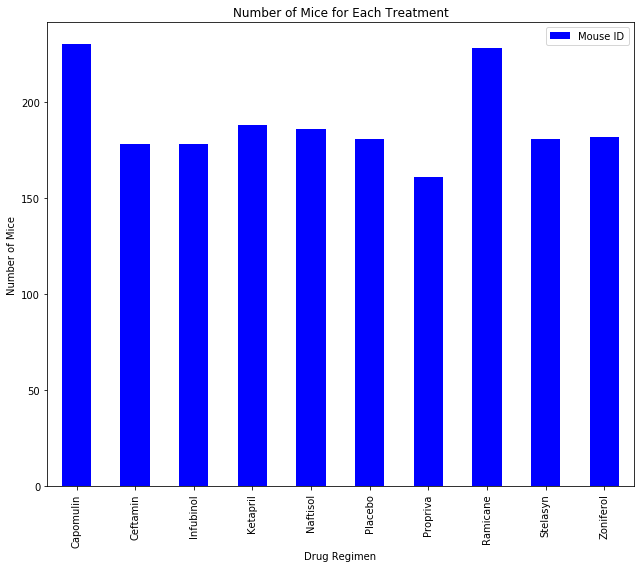

In [28]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

total_mice=pd.DataFrame(combined_file.groupby("Drug Regimen")["Mouse ID"].count())

total_mice_chart=total_mice.plot(kind="bar", figsize=(9,8),color='b', title="Number of Mice for Each Treatment")
total_mice_chart.set_xlabel("Drug Regimen")
total_mice_chart.set_ylabel("Number of Mice")
plt.tight_layout()

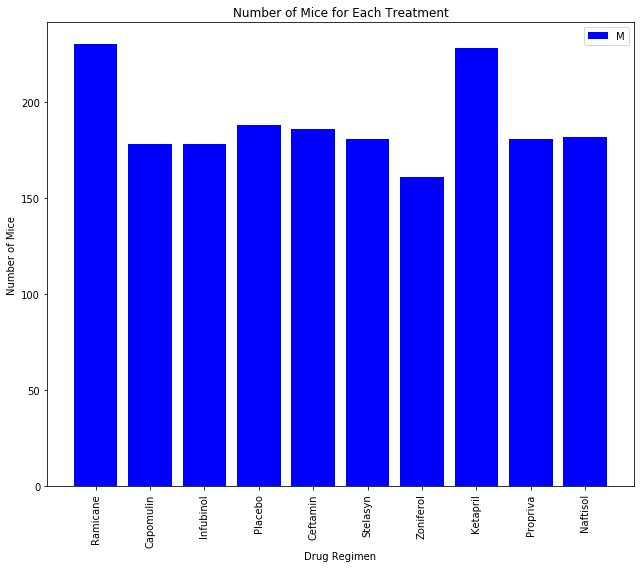

In [29]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#set x axis and tick locations 
x_axis= combined_file["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
#set y axis
total_mice1=combined_file.groupby("Drug Regimen")["Mouse ID"].count()
#plot
plt.figure(figsize=(9,8))
plt.bar(x_axis,total_mice1 , color='b', align="center")
plt.xticks(tick_locations,x_axis, rotation=90)
plt.legend("Mouse ID")
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()



## Pie Plots

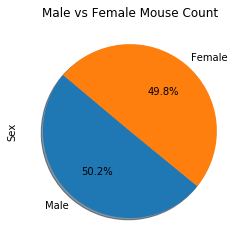

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie=newtable["Sex"].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=140, title="Male vs Female Mouse Count")

pie

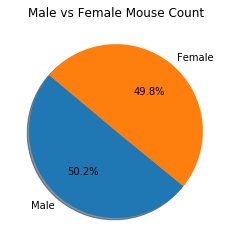

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=newtable["Sex"].unique()
data=newtable["Sex"].value_counts()

plt.pie(data,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Mouse Count")
plt.show()



## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

ConversionError: Failed to convert value(s) to axis units: array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

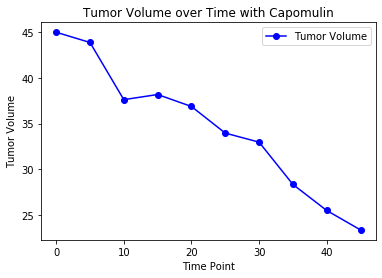

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#find a mouse ID that is being treated with Capomulin

single_mouse_ID=combined_file.loc[combined_file["Drug Regimen"] == "Capomulin", :]["Mouse ID"].values[0]
#Extract values associatd with that specifci mouse ID
Single_mouse_value=combined_file.loc[combined_file["Mouse ID"] == single_mouse_ID, :]
x=combined_file["Timepoint"].unique()
y=Single_mouse_value.groupby("Timepoint")["Tumor Volume (mm3)"].unique()
TumorVolume_handle, = plt.plot(x, y, marker ='o', color='blue', label="Tumor Volume")
plt.title("Tumor Volume over Time with Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.xticks(x_axis)
plt.show()


In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#plt.scatter(only_Capomulin["Weight (g)"], only_Capomulin["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            #s=x_axis, alpha=0.75)
x=only_Capomulin["Tumor Volume (mm3)"]
Weight=only_Capomulin.drop_duplicates("Mouse ID")
Weight = Weight.set_index("Mouse ID")
Tumor_volume=pd.DataFrame(only_Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

newtable1=pd.merge(Weight,Tumor_volume,on="Mouse ID")
newtable1["Weight (g)"] = newtable1["Weight (g)"].astype(float)
#plt.scatter(newtable1["Weight (g)"],newtable1["Tumor Volume (mm3)_y"], marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
#plt.title("Mouse Weight vs Average Tumor Volume")
#plt.xlabel("Mouse Weight")
#plt.ylabel("Average Tumor Volume")
#plt.show()
newtable1.dtypes


10     45.00
11     43.88
12     37.61
13     38.18
14     36.87
        ... 
440    47.69
1452   45.00
1453   45.60
1454   46.06
1455   46.54
Name: Tumor Volume (mm3), Length: 230, dtype: float64

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
